# 清理与分析WeRateDogs推特数据
## 收集

In [1]:
# 导入需要的库
import numpy as np
import pandas as pd
import requests
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 将CSV文件保存为 dataframe
archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# 下载推特图像的预测数据，将 .tsv文件保存为 dataframe
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/数据清洗/WeRateDogs项目/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [5]:
# 将推特的额外附加数据.txt 文件保存为 dataframe
tweet_list = []
file = open('tweet_json.txt')
for line in file.readlines():
    tweet_id = json.loads(line)['id']
    retweet_count = json.loads(line)['retweet_count']
    favorite_count = json.loads(line)['favorite_count']
    tweet_list.append({'tweet_id':tweet_id,
                    'retweet_count':retweet_count,
                    'favorite_count':favorite_count})
tweet = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## 评估
### 目测评估

In [6]:
# 将表中每个单元的内容显示完整
pd.set_option('max_colwidth', 200)

In [7]:
# 目测评估三个数据集
archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [8]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


### 编程评估

In [10]:
archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

In [13]:
all_columns = pd.Series(list(archive_enhanced)+list(tweet)+list(image_predictions))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

In [14]:
archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
archive_enhanced.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Penny           10
Tucker          10
Lola            10
Winston          9
Bo               9
the              8
Sadie            8
Daisy            7
an               7
Buddy            7
Bailey           7
Toby             7
Jack             6
Jax              6
Stanley          6
Oscar            6
Scout            6
Rusty            6
Leo              6
Dave             6
Milo             6
Koda             6
Bella            6
Phil             5
              ... 
Iroh             1
infuriating      1
Jeremy           1
Crimson          1
Poppy            1
Butters          1
Gòrdón           1
Zoe              1
Jim              1
Dale             1
Grizzwald        1
light            1
Ziva             1
Kayla            1
Berb             1
Naphaniel        1
Carll            1
Richie           1
Mona             1
Willie           1
Aldrick          1
Laika       

In [17]:
tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [18]:
sum(image_predictions.jpg_url.duplicated())

66

#### 质量
##### `archive_enhanced` 表格
- 错误的数据类型（timestamp列）
- 大量数据缺失（in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp列）
- rating_denominator列数据不完整，分母有不是10的数据
- rating_numerator列有些行数据提取错误，与text列中的信息不符
- 数据集中转发的Twitter信息无效
- 无图片的Twitter信息无效
- tweet_id数据类型错误
- doggo, floofer, pupper, poppo列有大量空值

##### `image_predictions` 表格
-  jpg_url列有大量重复值

#### 整洁度
- `archive_enhanced`表格中的doggo，floofer，pupper，puppo 列可合并为一个变量
- `archive_enhanced`、`image_predictions`、`tweet`三个表格可以合并



## 清理

In [19]:
# 备份三个数据集
archive_clean = archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_clean = tweet.copy()

#### 1.错误的数据类型(timestamp列)

##### 定义
使用 to_datetime 把timestamp一列的数据类型转换为datetime

##### 代码

In [20]:
# 修改数据类型,并保留时区信息
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp, utc=True)

##### 测试

In [21]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [22]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

#### 2. 大量数据缺失（in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp列）

##### 定义
用drop( )删除这些列（大量数据缺失，并且对此分析无用，所以删除）

##### 代码

In [23]:
# 解决问题二的代码
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### 测试

In [24]:
# 测试问题二是否正确清理完成
archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### 3-4. rating_numerator, rating_denominator列有些行数据提取错误，与text列中的信息不符

##### 定义
使用extract( )和正则表达式从`text`原文中重新提取评分rating列，然后再使用split()方法划分为rating_numerator和rating_denominator

##### 代码

In [25]:
archive_clean['rating'] = archive_clean.text.str.extract(r'(\d+\/\d+0)',expand=True)

In [26]:
archive_clean['rating'].value_counts()

12/10      558
11/10      463
10/10      462
13/10      351
9/10       157
8/10       102
14/10       56
7/10        53
5/10        37
6/10        32
3/10        19
4/10        15
2/10         9
1/10         8
0/10         2
15/10        2
420/10       2
4/20         2
75/10        2
143/130      1
666/10       1
84/70        1
45/50        1
1776/10      1
44/40        1
60/50        1
50/50        1
121/110      1
27/10        1
17/10        1
144/120      1
165/150      1
88/80        1
204/170      1
007/10       1
99/90        1
960/00       1
80/80        1
26/10        1
182/10       1
Name: rating, dtype: int64

In [27]:
#分母为10的n倍，且分子能被n整除
archive_clean[archive_clean.rating.isin(['4/20', '88/80', '144/120', '60/50', '99/90', '80/80', '50/50', '121/110', 
                                         '45/50', '84/70', '165/150', '204/170' ,'44/40', '960/00'])][['text', 'rating']]

,text,rating
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960/00
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84/70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165/150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204/170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4/20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50/50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99/90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80/80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45/50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60/50


In [28]:
#进行调整
archive_clean.rating.replace({'960/00':'13/10', '84/70':'12/10', '165/150':'11/10', '204/170':'12/10', '4/20':'13/10', '50/50':'11/10', '99/90':'11/10', '80/80':'10/10',
                             '45/50':'9/10', '60/50':'12/10', '44/40':'11/10', '4/20':np.nan, '121/110':'11/10', '144/120':'12/10', '88/80':'11/10'}, inplace=True)

In [29]:
#分母为10，但是分子远大于分母
archive_clean[archive_clean.rating.isin(['75/10', '007/10', '420/10', '27/10', '666/10', '182/10', '26/10', '1776/10'])][['text', 'rating']]

,text,rating
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420/10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666/10
290,@markhoppus 182/10,182/10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75/10
387,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",007/10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75/10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27/10
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776/10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26/10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420/10


In [30]:
#进行调整
archive_clean.rating.replace({'420/10':'nan', '666/10':np.nan, '182/10':np.nan, '75/10':'9.75/10', '007/10':'7/10', '27/10':'11.27/10', '1776/10':np.nan,
                              '26/10':'11.26/10','420/10':np.nan}, inplace=True)

In [31]:
archive_clean['rating_numerator'] = archive_clean.rating.str.split('/').str[0].astype(float)
archive_clean['rating_denominator'] = archive_clean.rating.str.split('/').str[1].astype(float)

##### 测试

In [32]:
archive_clean.rating_numerator.value_counts()

12.00     562
11.00     469
10.00     463
13.00     352
9.00      158
8.00      102
14.00      56
7.00       54
5.00       37
6.00       32
3.00       19
4.00       15
2.00        9
1.00        8
9.75        2
0.00        2
15.00       2
17.00       1
11.26       1
11.27       1
143.00      1
Name: rating_numerator, dtype: int64

#### 5. 数据集中转发的Twitter信息无效

##### 定义
使用isnull()函数返回没有转发状态的数据行, 从而删除数据集中转发的Twitter信息

##### 代码

In [33]:
#删除转发的twitter信息
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [34]:
#删除多余的数据列
archive_clean = archive_clean.drop('retweeted_status_id',axis=1)

##### 测试

In [35]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2165 non-null float64
rating_denominator    2165 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
rating                2165 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(9)
memory usage: 237.9+ KB


#### 6. 无图片的Twitter信息无效

##### 定义
使用notnull()函数返回有图片的数据行，从而过滤出有图片的Twitter信息

##### 代码

In [36]:
#筛选出有图片的数据行
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

##### 测试

In [37]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns, UTC]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2113 non-null float64
rating_denominator    2113 non-null float64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
rating                2113 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(9)
memory usage: 231.5+ KB


#### 7.  jpg_url列有大量重复值

##### 定义
使用drop_duplicates()函数删除冗余行

##### 代码

In [38]:
#删除冗余行
image_predictions_clean = image_predictions_clean.drop_duplicates()

#### 测试

In [39]:
#确认冗余行已删除
image_predictions_clean.duplicated().sum()

0

#### 整洁度

####  1. `archive_enhanced`表格中的doggo，floofer，pupper，puppo 列融合为一个变量

##### 定义
使用.melt()函数，将 doggo，floofer，pupper，puppo 列融合为 stage列 ,然后删除stage是空值的数据行。

##### 代码

In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns, UTC]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2113 non-null float64
rating_denominator    2113 non-null float64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
rating                2113 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(9)
memory usage: 231.5+ KB


In [41]:
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls','rating_numerator', 'rating_denominator',
                                                'name', 'rating'],  value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name='VarName', value_name='stage')

In [42]:
archive_clean.stage.value_counts()

None       8118
pupper      232
doggo        84
puppo        24
floofer      10
Name: stage, dtype: int64

In [43]:
#删除stage是空值的数据行，删除多余的列
archive_clean = archive_clean[archive_clean.stage != 'None'].drop('VarName', axis=1)

##### 测试

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 9 to 7222
Data columns (total 10 columns):
tweet_id              350 non-null int64
timestamp             350 non-null datetime64[ns, UTC]
source                350 non-null object
text                  350 non-null object
expanded_urls         350 non-null object
rating_numerator      350 non-null float64
rating_denominator    350 non-null float64
name                  350 non-null object
rating                350 non-null object
stage                 350 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 30.1+ KB


####  2. `archive_enhanced`、`image_predictions`、`tweet`三个表格可以合并

##### 定义
使用merge()函数合并三个数据集

##### 代码

In [45]:
#将三个表哥合并为df
df = archive_clean.merge(image_predictions, how='inner', on='tweet_id').merge(tweet, how='left', on='tweet_id')

#### 测试

In [46]:
#确认融合
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10.0,Cassie,14/10,doggo,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7684,32467
1,884162670584377345,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12.0,10.0,Yogi,12/10,doggo,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,3099,20719
2,872967104147763200,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",12.0,10.0,None,12/10,doggo,...,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,5632,27918
3,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12.0,10.0,Napolean,12/10,doggo,...,0.974781,True,briard,0.020041,True,swab,0.003228,False,3608,20687
4,869596645499047938,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He just graduated. Officially a doggo now. Have fun with taxes and losing sight of your ambitions. 12/10 would throw cap for https://t.co/DsA2hwXAJo,"https://twitter.com/dog_rates/status/869596645499047938/photo/1,https://twitter.com/dog_rates/status/869596645499047938/photo/1",12.0,10.0,Scout,12/10,doggo,...,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,3300,16431


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 316
Data columns (total 23 columns):
tweet_id              317 non-null int64
timestamp             317 non-null datetime64[ns, UTC]
source                317 non-null object
text                  317 non-null object
expanded_urls         317 non-null object
rating_numerator      317 non-null float64
rating_denominator    317 non-null float64
name                  317 non-null object
rating                317 non-null object
stage                 317 non-null object
jpg_url               317 non-null object
img_num               317 non-null int64
p1                    317 non-null object
p1_conf               317 non-null float64
p1_dog                317 non-null bool
p2                    317 non-null object
p2_conf               317 non-null float64
p2_dog                317 non-null bool
p3                    317 non-null object
p3_conf               317 non-null float64
p3_dog                317 non-null bool
ret

#### 8.  tweet_id 数据类型错误

##### 定义
使用astype()函数修改数据类型

##### 代码

In [63]:
df['tweet_id'] = df['tweet_id'].astype('category')

##### 测试

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 316
Data columns (total 23 columns):
tweet_id              317 non-null category
timestamp             317 non-null datetime64[ns, UTC]
source                317 non-null object
text                  317 non-null object
expanded_urls         317 non-null object
rating_numerator      317 non-null float64
rating_denominator    317 non-null float64
name                  317 non-null object
rating                317 non-null object
stage                 317 non-null object
jpg_url               317 non-null object
img_num               317 non-null int64
p1                    317 non-null object
p1_conf               317 non-null float64
p1_dog                317 non-null bool
p2                    317 non-null object
p2_conf               317 non-null float64
p2_dog                317 non-null bool
p3                    317 non-null object
p3_conf               317 non-null float64
p3_dog                317 non-null bool




### 存储清理后的主数据集

In [50]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
df.to_csv('twitter_archive_master.csv', encoding='utf_8', index=False)


## 分析和可视化

**在报告中将探索的问题：**

**Q1:**不同地位的狗狗评分情况；

**Q2:**哪个地位的狗狗最受欢迎？

**Q3:**狗狗评分与点赞数和转发数之间是否有联系？


### Q1: 不同地位的狗狗评分情况

In [51]:
pupper_rating = df.query('stage == "pupper"')['rating_numerator']
doggo_rating = df.query('stage == "doggo"')['rating_numerator']
puppo_rating = df.query('stage == "puppo"')['rating_numerator']
floofer_rating = df.query('stage == "floofer"')['rating_numerator']

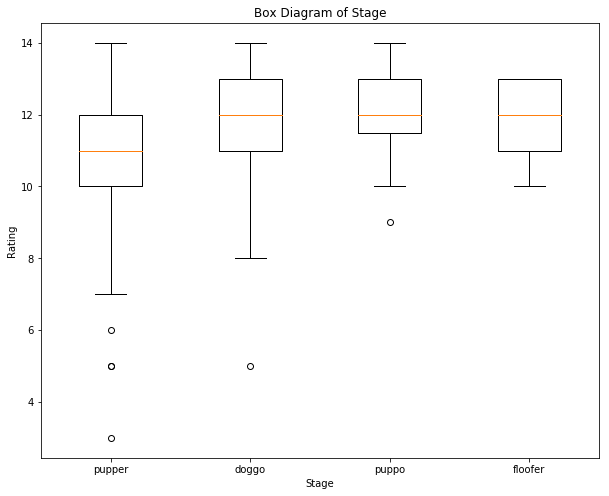

In [52]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
data =[pupper_rating, doggo_rating, puppo_rating, floofer_rating]

labels = ['pupper', 'doggo', 'puppo', 'floofer']
ax.boxplot(data, labels=labels);
plt.title('Box Diagram of Stage')
plt.xlabel('Stage')
plt.ylabel('Rating');

**由箱线图得出，floofer狗狗评分最高，然后依次是puppo, doggo, pupper狗狗。**

### Q2: 哪个地位的狗狗最受欢迎？

In [53]:
#通过点赞数和转发数评估受欢迎情况
retweet = df.groupby('stage').retweet_count.mean()
favorite = df.groupby('stage').favorite_count.mean()
len(retweet)

4

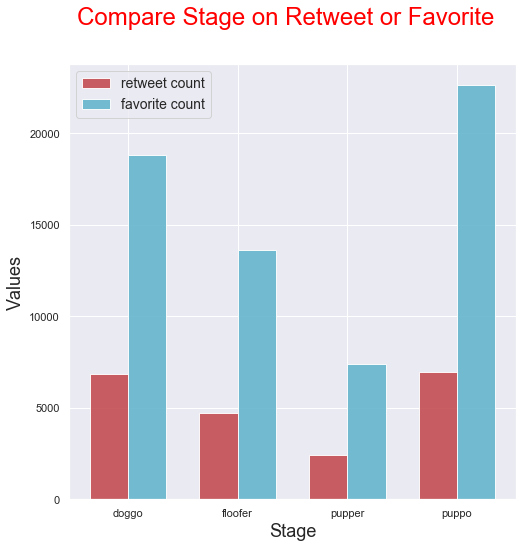

In [54]:
sns.set(context = 'notebook',)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(retweet))

w=0.35
ax.bar(ind, retweet, color = 'r', alpha = 0.9, width = w, label = "retweet count")
ax.bar(ind+w, favorite, color='c', alpha = 0.9, width = w, label = "favorite count")

ax.legend(loc = 'best', fontsize = 14)
ax.set_xticks(ind+w/2)

mean_label = retweet.index
ax.set_xticklabels(mean_label)

ax.set_ylabel('Values', fontsize=18)
ax.set_xlabel('Stage',fontsize=18)
fig.suptitle('Compare Stage on Retweet or Favorite', fontsize=24, color='red');

**由柱状图可得出各个地位狗狗受欢迎程度排名为：puppo > doggo > floofer > pupper, 其中*puppo*地位的狗狗最受欢迎。**

### Q3: 狗狗评分与受欢迎程度(点赞数和转发数)之间是否有联系？

In [55]:
favorite_rating = df[['retweet_count', 'favorite_count', 'rating_numerator']]

In [56]:
# 按评分大小对提取的数组排序
favorite_rating = favorite_rating.sort_values(by='rating_numerator', ascending=False)[10:]
favorite_rating.head(10)


,retweet_count,favorite_count,rating_numerator
301,19563,56199,14.0
110,17089,31684,14.0
220,17649,35994,14.0
94,16564,50326,14.0
100,8245,33792,14.0
109,11791,12961,13.0
76,52101,74885,13.0
300,1695,19391,13.0
45,2497,9352,13.0
47,27586,55479,13.0


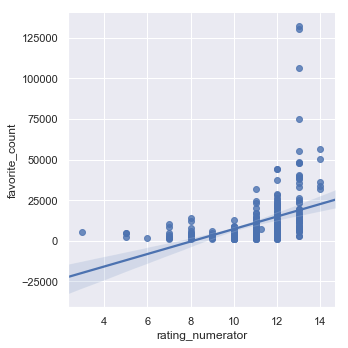

In [57]:
# 用lmplot方法可视化对两个变量绘制散点图
sns.lmplot('rating_numerator','favorite_count',data=favorite_rating)

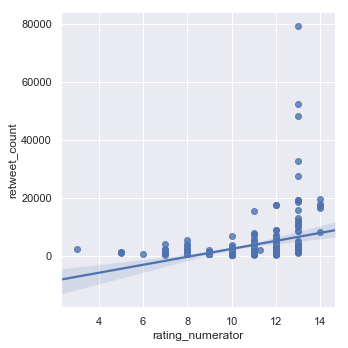

In [58]:
sns.lmplot('rating_numerator','retweet_count',data=favorite_rating)

**由散点图得出，点赞数与转发数与评分均呈正相关。也就是说，狗狗评分越高，被人们看到的机会越大，从而转发数和点赞数都会增加，就会有更多的人喜欢这些狗狗。**


## 总结


**WeRateDogs推特账号对人们发送的狗狗照片进行评分和评级，将可爱的动物与幽默的评论结合起来，从而受到大量Twitter用户和媒体的关注。**

**通过分析发现，不同地位的狗狗们的评分存在差异，floofer狗狗评分最高，然后依次是puppo, doggo, pupper狗狗。**

**继续分析转发数和点赞数与狗狗不同地位之间的联系，得出puppo地位的狗狗最受欢迎。WeRateDogs给出的评分越高，狗狗越容易受欢迎。**

** **
